###Exploratory Data Analysis (EDA) 

Importing Required Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Adding Dataset

In [ ]:
df = pd.read_csv('/content/gld_price_data.csv')

Head of Dataset

In [ ]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01-02-2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,01-03-2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,01-04-2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,01-07-2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,01-08-2008,1390.189941,86.779999,76.059998,15.590,1.557099


Tail of Dataset

In [ ]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,05-08-2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,05-09-2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,05-10-2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


Shape of Dataset

In [ ]:
df.shape

(2290, 6)

Describing the Dataset

In [ ]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2284.000000,2263.000000,2288.000000,2289.000000,2290.000000
mean,1654.039745,122.831292,31.802992,20.087279,1.283653
std,518.702087,23.196631,19.454051,7.093275,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1237.652527,109.879997,14.377500,15.570000,1.171313
50%,1551.849976,120.620003,33.865000,17.270000,1.303297
75%,2072.890075,132.830002,37.820000,22.889999,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Info of Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2284 non-null   float64
 2   GLD      2263 non-null   float64
 3   USO      2288 non-null   float64
 4   SLV      2289 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


Missing Data

In [ ]:
df.isnull().sum()

Date        0
SPX         6
GLD        27
USO         2
SLV         1
EUR/USD     0
dtype: int64

Filling Missing Data

In [ ]:
df = df.fillna(method='bfill')
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01-02-2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,01-03-2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,01-04-2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,01-07-2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,01-08-2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,05-08-2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,05-09-2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,05-10-2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [ ]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

HeatMap

In [ ]:
correlation = df.corr()

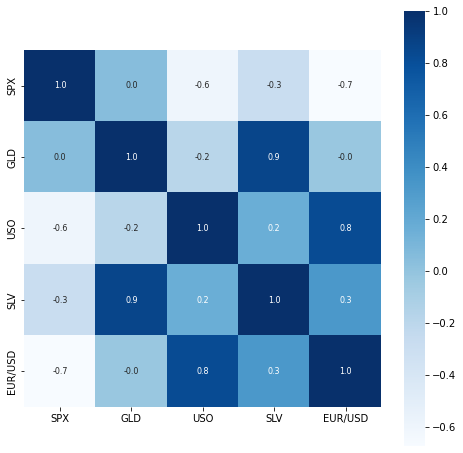

In [ ]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

Outliers Detection

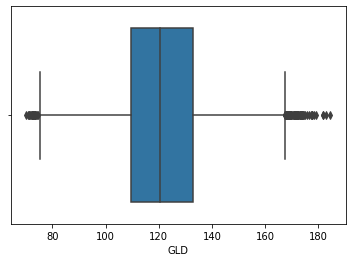

In [ ]:
sns.boxplot(data=df,x=df["GLD"])

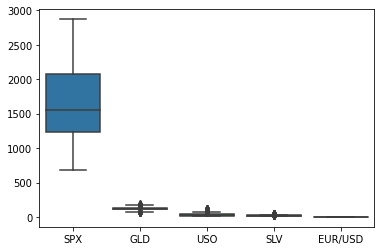

In [ ]:
sns.boxplot(data=df)

Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')

encoder_df = pd.DataFrame(encoder.fit_transform(df[['GLD']]).toarray())

final_df = df.join(encoder_df)
print(final_df)

            Date          SPX         GLD        USO      SLV   EUR/USD    0  \
0     01-02-2008  1447.160034   84.860001  78.470001  15.1800  1.471692  0.0   
1     01-03-2008  1447.160034   85.570000  78.370003  15.2850  1.474491  0.0   
2     01-04-2008  1411.630005   85.129997  77.309998  15.1670  1.475492  0.0   
3     01-07-2008  1416.180054   84.769997  75.500000  15.0530  1.468299  0.0   
4     01-08-2008  1390.189941   86.779999  76.059998  15.5900  1.557099  0.0   
...          ...          ...         ...        ...      ...       ...  ...   
2285  05-08-2018  2671.919922  124.589996  14.060000  15.5100  1.186789  0.0   
2286  05-09-2018  2697.790039  124.330002  14.370000  15.5300  1.184722  0.0   
2287  05-10-2018  2723.070068  125.180000  14.410000  15.7400  1.191753  0.0   
2288   5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118  0.0   
2289   5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033  0.0   

        1    2    3  ...  1897  1898  1

Univariate

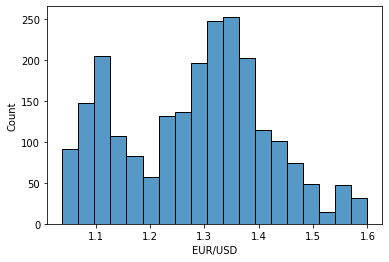

In [ ]:
sns.histplot(df['EUR/USD'])

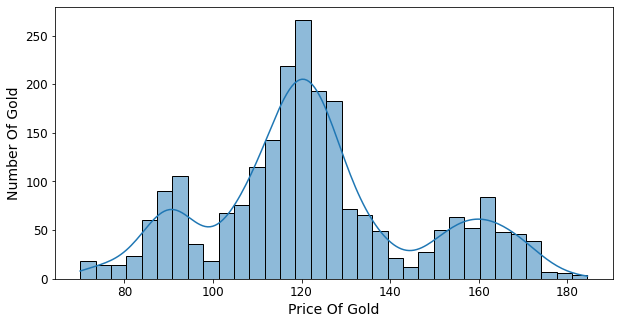

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='GLD',kde=True)
plt.xlabel("Price Of Gold",fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Number Of Gold",fontsize=14)
plt.yticks(fontsize=12)
plt.show()

Bivarite

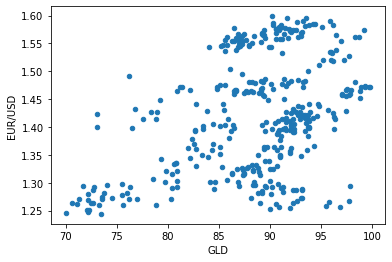

In [ ]:
df[df['GLD'] < 100].plot.scatter(x='GLD', y='EUR/USD')